In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
df= pd.read_csv('data/HR.csv')
# df_data= pipe.fit_transform(df)
# df.loc[df.index == 72]
# pipe.fit_transform(df)
df_data=df
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


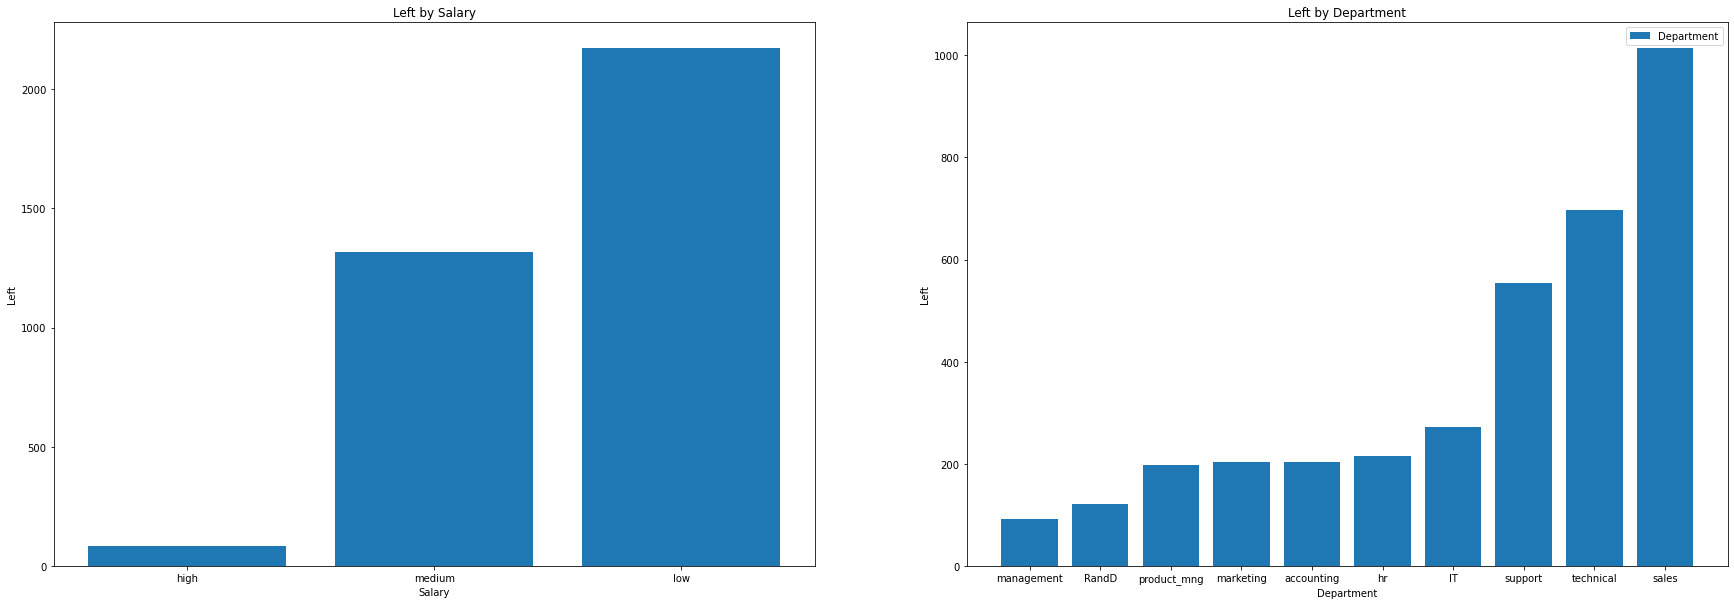

In [44]:
df_salary=df.groupby('salary')['left'].sum().sort_values()
df_dep=df.groupby('Department')['left'].sum().sort_values()
plt.figure(figsize = (30, 10))
plt.subplot(1,2,1)
plt.bar(df_salary.index,df_salary, label='Salary')
plt.xlabel("Salary")
plt.ylabel("Left")
plt.title("Left by Salary")
plt.subplot(1,2,2)
plt.bar(df_dep.index,df_dep, label='Department')
plt.xlabel("Department")
plt.ylabel("Left")
plt.title("Left by Department")
plt.legend(loc='best')
plt.show()

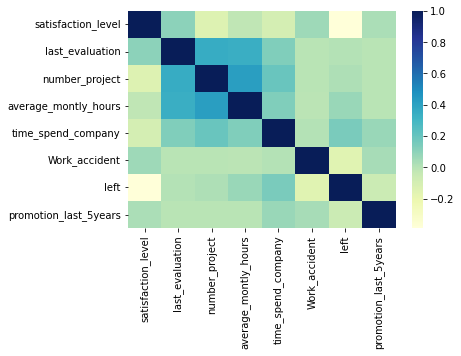

In [6]:
sns.heatmap(df_data.corr(),cmap="YlGnBu")
plt.show()

In [8]:
class DepartmentEncoder(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        le = LabelEncoder()
        label = le.fit_transform(X['Department'])
        X.drop("Department", axis=1, inplace=True)
        X["Department"] = label
        return X
class SalaryEncoder(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        le = LabelEncoder()
        label = le.fit_transform(X['salary'])
        X.drop("salary", axis=1, inplace=True)
        X["salary"] = label
        return X
    
class ColumnDrop(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X=X.drop('last_evaluation',axis=1)
        X=X.drop('number_project',axis=1)
        X=X.drop('promotion_last_5years',axis=1)
        X=X.drop('Work_accident',axis=1)
        return X

In [9]:
pipe=Pipeline([
    ("depencoder",DepartmentEncoder()),
    ("salencoder",SalaryEncoder()),
    ("coldropper",ColumnDrop())
])
x=df_data.drop('left',axis=1)
x=pipe.fit_transform(x)
y=df_data['left']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=100)

In [18]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [19]:
y_test_pred=model.predict(x_test)

In [20]:
score=accuracy_score(y_test,y_test_pred)
score

0.7726666666666666

In [21]:
model.predict_proba(x_test)
model.score(x_test,y_test)

0.7726666666666666

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(max_depth=10,max_features=1)
rfc.fit(x_train,y_train)
rfc.score(x_test, y_test)

0.968

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

In [24]:
k2=range(2,60,2)
param_grid = {'n_neighbors':k2}

In [25]:
grid_search=GridSearchCV(knn,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 60, 2)},
             return_train_score=True, scoring='accuracy')

In [27]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [123]:
grid_search.score(x_test,y_test)

0.9326666666666666

In [28]:
from sklearn.metrics import classification_report
y_pred = grid_search.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1107
           1       0.90      0.83      0.87       393

    accuracy                           0.93      1500
   macro avg       0.92      0.90      0.91      1500
weighted avg       0.93      0.93      0.93      1500



In [29]:
from sklearn.metrics import confusion_matrix
y_pred = grid_search.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1072,   35],
       [  66,  327]], dtype=int64)

Text(42.0, 0.5, 'Truth')

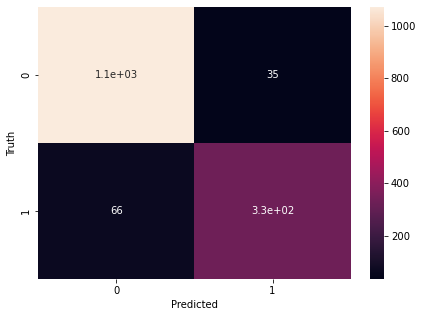

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
x_test['left']=y_test
x_test['left predict']=y_pred

In [33]:
x_test

,satisfaction_level,average_montly_hours,time_spend_company,Department,salary,left,left predict
10155,0.72,189,2,8,2,0,0
11688,0.94,144,4,8,1,0,0
12598,0.37,157,3,0,1,1,1
12192,0.74,232,5,9,2,1,1
8678,0.13,178,5,8,1,0,0
...,...,...,...,...,...,...,...
9395,0.73,273,4,5,2,0,0
14905,0.11,247,4,9,2,1,1
10505,0.80,189,2,8,2,0,0
3214,0.93,156,3,5,1,0,0


In [47]:
data={
    "satisfaction_level":[0.3],
    "average_montly_hours":[400],
    "time_spend_company":[10],
    "Department": [3],
    "salary":[1]
}
df_test=pd.DataFrame(data)
y_pred = grid_search.predict(df_test)
y_pred

array([1], dtype=int64)